### Over- and underfitting with decision trees

### Load the data

In [1]:
import numpy as np
data = np.load('data.npz')
X,y = data["X"],data["y"]
print X.shape, y.shape

(4505, 2) (4505,)


### Select a validation set

In [2]:
from sklearn.cross_validation import train_test_split
np.random.seed(1337)
Xtr,Xts,Ytr,Yts = train_test_split(X,y,test_size=0.5)

### Plot the full dataset

/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


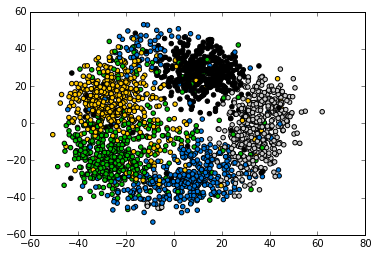

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Xtr[:,0],Xtr[:,1],c=Ytr,cmap='spectral')

# Train the decision tree

Scikit-learn Decision Tree classifier has a few notable parameters

* criterion : 'gini' or 'entropy', used to select best split (default gini).
* max_depth :  The maximum depth of the tree. (default unlimited).
* min_samples_split : The minimum number of samples required to split an internal node (default 2).
* min_samples_leaf : The minimum number of samples required to be at a leaf node (default 1).

For now, all of them are at their default values, but we shall need them soon.

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(Xtr,Ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

### Display decision boundaries

In [5]:
from sklearn.metrics import accuracy_score
def plot_decision_surface(clf,X,y,
                          plot_step = 0.2,
                          cmap='spectral',
                          figsize=(12,8)
                         ):
    # Plot the decision boundary
    
    plt.figure(figsize=figsize)
    
    n_classes = len(set(y))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,alpha=0.5)    
    y_pred = clf.predict(X)

    # Plot the training points
    plt.scatter(*X[y_pred==y].T,c = y[y_pred==y],
                marker='.',cmap=cmap,alpha=0.5,label='correct')
    plt.scatter(*X[y_pred!=y].T,c = y[y_pred!=y],
                marker='x',cmap=cmap,s=50,label='errors')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis("tight")
    plt.legend(loc='best')
    print "Accuracy = ",accuracy_score(y,y_pred)


### Training performance

Accuracy =  1.0


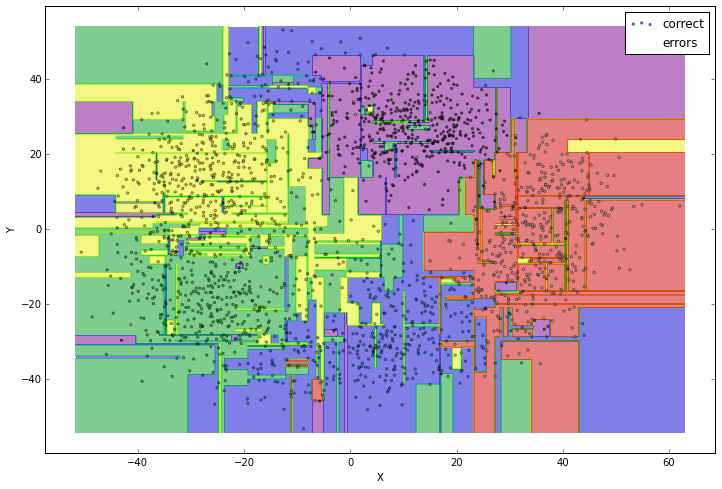

In [6]:
plot_decision_surface(tree,Xtr,Ytr)

### Validation performance

Accuracy =  0.713715046605


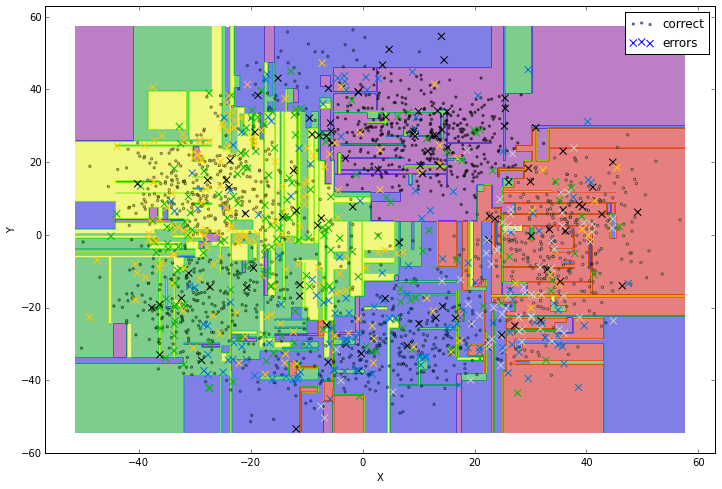

In [13]:
plot_decision_surface(tree,Xts,Yts)

### That's too bad for MLHEP!
A tree has badly overfitted the noizy dataset and as a result it generalized poorly to the validation set.

Your first quest is to fix this issue by tweaking decision tree hyperparameters. A few most helpful ones are provided above the DecisionTreeClassifier definition.
 * Accuracy >= 0.72 is a start, but you can do better
 * Accuracy >= 0.75 is better, but still improvable
 * Accuracy >= 0.78 is a reasonably good result
 * Accuracy >= 0.8 is either epic skill or luck. Be sure to tell us if you got it!
 
For now, you can do all the tweaks in the tree definition above.

Accuracy =  0.781624500666


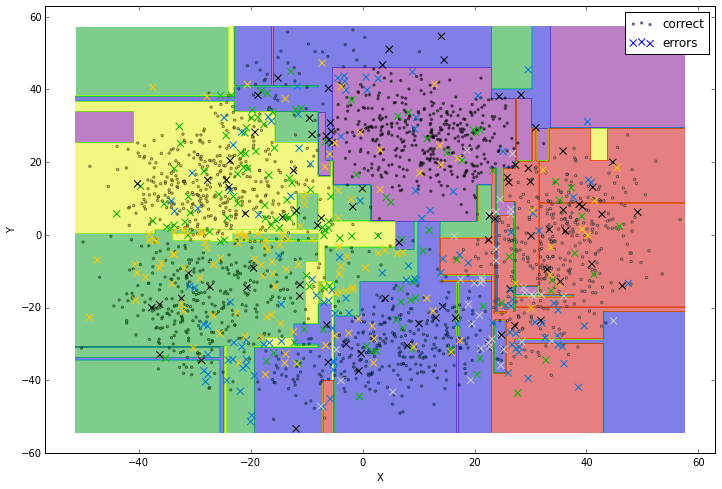

In [56]:
tree = DecisionTreeClassifier(max_depth=8)
tree.fit(Xtr,Ytr)
plot_decision_surface(tree,Xts,Yts)

### Grid search

__Bonus mission__ is to get the optimal hyperparameter values automatically via exhaustive search.

You should write a script that automatically tries all combinations of hyperparameters from a reasonable range and finds optimal ones in terms of validation accuracy.

In [ ]:
<your code here>

final_model = <your_code>

In [ ]:
plot_decision_surface(final_model,Xts,Yts)

### Still overfitting

While your parameters are optimal on the validation set, the very fact that you tweaked them on validation data means that you have implicitly __trained your model on the validation set__.

Consequently, you can no longer consider validation score to be a fair estimate of your model generalization power?
How to overcome that?

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

Yup, you just create yet another "hidden test set" and hide it under a rock before you do anything to only evaluate after you came up with a final model.

Alternatively, use crossvalidation for hyperparameter search.